# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
weather_output = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Function to connect to API
def querygen(api_key='', city=cities):
    url ='https://api.openweathermap.org/data/2.5/weather'

    return f'{url}?q={city}&appid={api_key}&units=imperial'

In [4]:
#Set preliminary variables
crec=0

cmax=len(cities)

citylist=[]
clouds=[]
country=[]
date=[]
humidity=[]
weather_lat=[]
weather_long=[]
max_temp=[]
wind_speed=[]

In [5]:
#Extract data from API
for c in cities:
    crec=crec + 1
    response=requests.get(querygen(api_key=api_key, city=c)).json()

    try:
        print(f'Processing city {crec} of {cmax}: {response["name"]}')
        #print(f'------------------------------------------------------')
        citylist.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        weather_lat.append(response['coord']['lat'])
        weather_long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except:
        pass
        print(f'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
        print(f'Sorry, we could not find weather for {c}')
        print(f'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')


Processing city 1 of 611: Alofi
Processing city 2 of 611: Mahebourg
Processing city 3 of 611: Gigmoto
Processing city 4 of 611: Avarua
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Sorry, we could not find weather for belushya guba
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Processing city 6 of 611: Punta Arenas
Processing city 7 of 611: Khatanga
Processing city 8 of 611: Hermanus
Processing city 9 of 611: Arraial do Cabo
Processing city 10 of 611: Hasaki
Processing city 11 of 611: Grand Gaube
Processing city 12 of 611: Atuona
Processing city 13 of 611: Ilulissat
Processing city 14 of 611: Tarancon
Processing city 15 of 611: Thompson
Processing city 16 of 611: Majene
Processing city 17 of 611: Maceio
Processing city 18 of 611: Albany
Processing city 19 of 611: Kytmanovo
Processing city 20 of 611: Katobu
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Sorry, we could not find weather for palabuhanratu
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$

Processing city 164 of 611: Upernavik
Processing city 165 of 611: Kochevo
Processing city 166 of 611: Rome
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Sorry, we could not find weather for bengkulu
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Processing city 168 of 611: Mpika
Processing city 169 of 611: Isangel
Processing city 170 of 611: Saskylakh
Processing city 171 of 611: Dubrovnik
Processing city 172 of 611: Soverato
Processing city 173 of 611: Taoudenni
Processing city 174 of 611: Okha
Processing city 175 of 611: Cloquet
Processing city 176 of 611: Puerto Ayacucho
Processing city 177 of 611: Santiago del Estero
Processing city 178 of 611: Matamoros
Processing city 179 of 611: Asyut
Processing city 180 of 611: Creston
Processing city 181 of 611: Yulara
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Sorry, we could not find weather for beypur
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Processing city 183 of 611: Kota Kinabalu
Processing city 184 

Processing city 322 of 611: Kieta
Processing city 323 of 611: Severo-Kurilsk
Processing city 324 of 611: Vestmannaeyjar
Processing city 325 of 611: Bronnoysund
Processing city 326 of 611: Yar-Sale
Processing city 327 of 611: Araceli
Processing city 328 of 611: Smoky Lake
Processing city 329 of 611: Baker City
Processing city 330 of 611: Fortuna
Processing city 331 of 611: Palmerston
Processing city 332 of 611: Palmer
Processing city 333 of 611: Malgobek
Processing city 334 of 611: Cap Malheureux
Processing city 335 of 611: Krasnoborsk
Processing city 336 of 611: Kanina
Processing city 337 of 611: Port Hedland
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Sorry, we could not find weather for teluk nibung
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Processing city 339 of 611: Seoul
Processing city 340 of 611: Maningrida
Processing city 341 of 611: Penzance
Processing city 342 of 611: Otane
Processing city 343 of 611: Pendra
Processing city 344 of 611: Iskateley
Processi

Processing city 499 of 611: Muromtsevo
Processing city 500 of 611: Carutapera
Processing city 501 of 611: Pinheiro Machado
Processing city 502 of 611: Gezing
Processing city 503 of 611: Westport
Processing city 504 of 611: Miles City
Processing city 505 of 611: Loa Janan
Processing city 506 of 611: Lasa
Processing city 507 of 611: Vrangel
Processing city 508 of 611: Mamboma
Processing city 509 of 611: Usinsk
Processing city 510 of 611: Ugoofaaru
Processing city 511 of 611: Kushima
Processing city 512 of 611: Belaya Gora
Processing city 513 of 611: Ust-Maya
Processing city 514 of 611: Yumen
Processing city 515 of 611: Hervey Bay
Processing city 516 of 611: Gweru
Processing city 517 of 611: Guarapari
Processing city 518 of 611: Danielskuil
Processing city 519 of 611: Teguldet
Processing city 520 of 611: Bajil
Processing city 521 of 611: Pestravka
Processing city 522 of 611: Juneau
Processing city 523 of 611: Dikson
Processing city 524 of 611: Zima
Processing city 525 of 611: Cockburn Tow

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df_weather = pd.DataFrame({
    "City": citylist,
    "Clouds": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": weather_lat,
    "Long": weather_long,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed})
df_weather.head()

,City,Clouds,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Alofi,40,NU,1565641443,88,-19.06,-169.92,77.00,10.29
1,Mahebourg,40,MU,1565641443,68,-20.41,57.70,72.00,12.75
2,Gigmoto,78,PH,1565641443,78,13.78,124.39,82.88,16.80
3,Avarua,94,CK,1565641181,78,-21.21,-159.78,78.80,3.36
4,Punta Arenas,20,CL,1565641444,59,-53.16,-70.91,37.40,19.46


In [9]:
#Export extracted API data to csv
df_weather.to_csv(weather_output)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

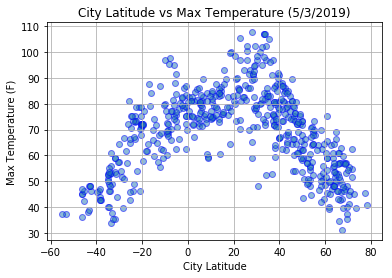

In [11]:
#Use matplotlib to visualize latitude vs temperature
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Max Temp'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Max Temperature (5/3/2019)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_temp_scatter.png')
plt.show()

#### Latitude vs. Humidity Plot

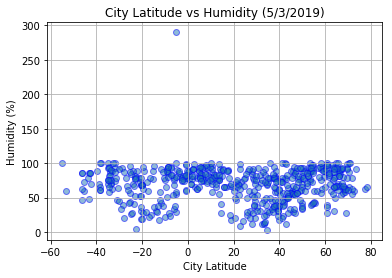

In [12]:
#Use matplotlib to visualize latitude vs humidity
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Humidity'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Humidity (5/3/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_humidity_scatter.png')
plt.show()

#### Latitude vs. Cloudiness Plot

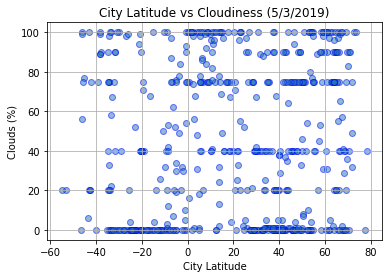

In [13]:
#Use matplotlib to visualize latitude vs clouds
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Clouds'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Cloudiness (5/3/2019)')
plt.ylabel('Clouds (%)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_cloud_scatter.png')
plt.show()

#### Latitude vs. Wind Speed Plot

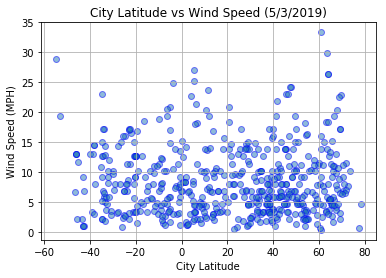

In [14]:
#Use matplotlib to visualize latitude vs wind speed
lat_temp=plt.scatter(df_weather['Lat'],df_weather['Wind Speed'],edgecolors='blue',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Wind Speed (5/3/2019)')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('City Latitude')
plt.savefig('output/lat_wind_scatter.png')
plt.show()